In [2]:
import pandas as pd

# New working dataset URL
url = "https://raw.githubusercontent.com/DeekshithaChandupatla/Netflix-Data-Analysis/main/Netflix%20Dataset.csv"
df = pd.read_csv(url)

# Show the first 5 rows
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# Shape of the data (rows, columns)
df.shape


(7789, 11)

In [4]:
# See column names
df.columns


Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [5]:
# Quick summary of non-null values and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [6]:
# Count of Movies vs TV Shows
df['Category'].value_counts()


,count
Category,
Movie,5379
TV Show,2410


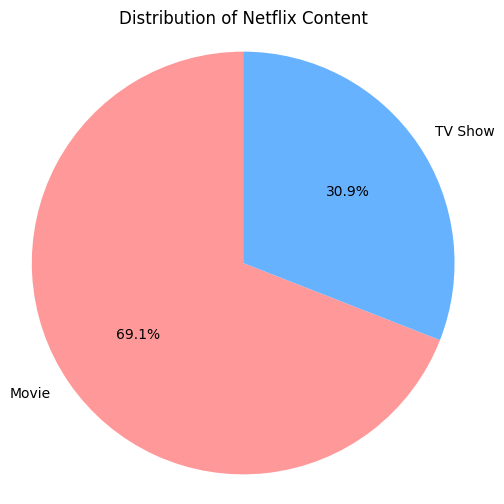

In [7]:
import matplotlib.pyplot as plt

# Count categories
category_counts = df['Category'].value_counts()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['#FF9999','#66B2FF'], startangle=90)
plt.title('Distribution of Netflix Content')
plt.axis('equal')  # Equal aspect ratio = perfect circle
plt.show()


In [10]:
# Show all column names
df.columns.tolist()


['Show_Id',
 'Category',
 'Title',
 'Director',
 'Cast',
 'Country',
 'Release_Date',
 'Rating',
 'Duration',
 'Type',
 'Description']

/tmp/ipython-input-13-1700076830.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = df['Release_Date'].dt.year


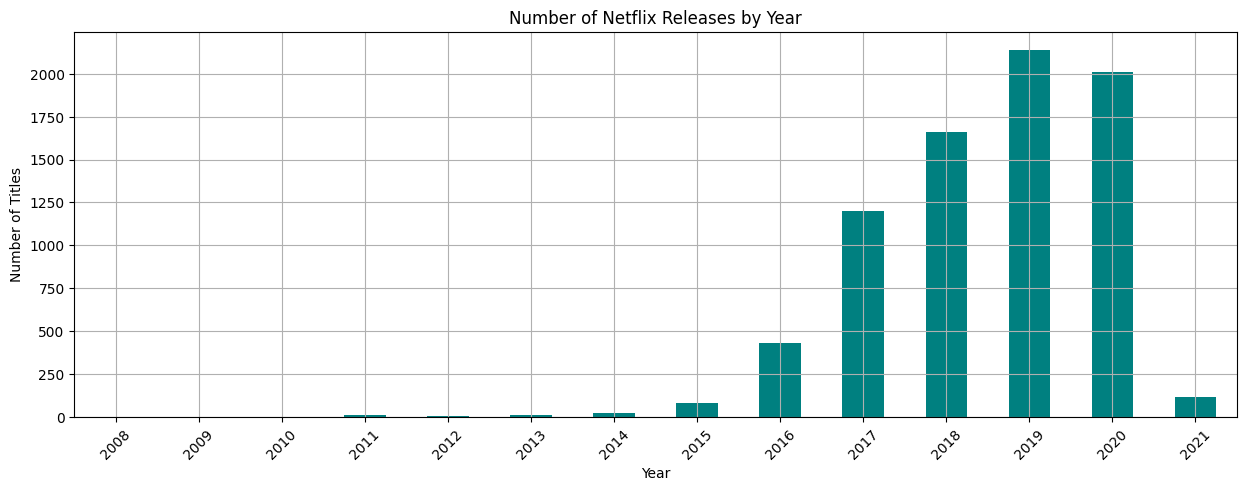

In [13]:
# First, drop rows where 'Release_Date' is missing or invalid
df = df[df['Release_Date'].notnull()]

# Now convert to datetime safely, forcing errors to NaT (Not a Time)
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Drop any rows where conversion failed
df = df.dropna(subset=['Release_Date'])

# Extract the year
df['release_year'] = df['Release_Date'].dt.year

# Plot the number of releases per year
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5), color='teal')

plt.title('Number of Netflix Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
